# Trees and Forests



## Training a Decision Tree Classifier

### Load Data From CSV File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [ ]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis


In [ ]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


### Feature set

Lets define feature sets, X:

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [ ]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:10]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [ ]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix


decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)

target_predicted=model.predict(X_test)
print("Accuracy", model.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.395
Class Confusion Matrix
 [[30  6 10  5]
 [ 7 19  8 10]
 [15 14 17  8]
 [18  9 11 13]]


### Discussion
Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default `DecisionTreeClassifier` uses Gini impurity:
$$
G(t) = 1 - \sum_{i=1}^c{p_i^2}
$$
where G(t) is the Gini impurity at node t and $p_i$ is the proportion of observations of class c at node t.

This process of finding the decision rules that create splits to increase impurity is repeated recursively untill all leaf nodes are pure (i.e. contain only one class) or some abritary cut-off is reached

We can change the `criterion` parameter to use a different impurity measurement

In [ ]:
# create decision tree classifier using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = decisiontree_entropy.fit(X_train, y_train)

target_predicted=model_entropy.predict(X_test)
print("Accuracy", model_entropy.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.335
Class Confusion Matrix
 [[23  9 10  9]
 [13 12  7 12]
 [14 16 17  7]
 [12 12 12 15]]


In [ ]:

import pandas
from sklearn.model_selection import train_test_split

df = pd.read_csv('teleCust1000t.csv')

X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = df['custcat'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)

# 1. Entropi hesaplayan fonksiyon
def entropy(y):
    total = len(y)
    _, counts = np.unique(y, return_counts=True)

    ent = 0
    for count in counts:
        p = count / total
        ent -= p * np.log2(p)

    return ent

# 2. Belirli bir özelliğe ve eşik değere göre veriyi ikiye bölen fonksiyon
def split(X, y, feature_index, threshold, is_categorical):
    left_X, left_y, right_X, right_y = [], [], [], []

    for i in range(len(X)):
        if is_categorical:
            if X[i][feature_index] == threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])
        else:
            if X[i][feature_index] <= threshold:
                left_X.append(X[i])
                left_y.append(y[i])
            else:
                right_X.append(X[i])
                right_y.append(y[i])

    return np.array(left_X), np.array(left_y), np.array(right_X), np.array(right_y)

# 3. Bilgi kazancını hesaplayan fonksiyon
def information_gain(y, left_y, right_y):
    parent_entropy = entropy(y)
    n = len(y)
    n_left = len(left_y)
    n_right = len(right_y)

    if n_left == 0 or n_right == 0:
        return 0

    weighted_entropy = (n_left / n) * entropy(left_y) + (n_right / n) * entropy(right_y)
    return parent_entropy - weighted_entropy

# 4. En iyi özelliği ve eşik değerini bulan fonksiyon
def best_split(X, y, categorical_features):
    best_gain = -1
    best_feature, best_threshold = None, None
    n_features = X.shape[1]

    for feature_index in range(n_features):
        is_categorical = feature_index in categorical_features
        thresholds = np.unique(X[:, feature_index])

        for threshold in thresholds:
            left_X, left_y, right_X, right_y = split(X, y, feature_index, threshold, is_categorical)
            gain = information_gain(y, left_y, right_y)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold
    return best_feature, best_threshold

# 5. Ağacın düğümünü temsil eden sınıf
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None, entropy=None, sample_count=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.entropy = entropy
        self.sample_count = sample_count

    def is_leaf(self):
        return self.value is not None

# 6. Ağaç yapısını oluşturan recursive fonksiyon
def build_tree(X, y, categorical_features, depth=0, max_depth=4):
    unique_labels, counts = np.unique(y, return_counts=True)

    current_entropy = entropy(y)
    current_sample_count = len(y)

    if len(unique_labels) == 1 or len(X) < 2 or depth == max_depth:
        return Node(value=unique_labels[np.argmax(counts)], entropy=current_entropy, sample_count=current_sample_count)  # Sınıfı seçiyoruz

    feature, threshold = best_split(X, y, categorical_features)
    if feature is None:
        return Node(value=unique_labels[np.argmax(counts)], entropy=current_entropy, sample_count=current_sample_count)

    is_categorical = feature in categorical_features
    left_X, left_y, right_X, right_y = split(X, y, feature, threshold, is_categorical)

    left_child = build_tree(left_X, left_y, categorical_features, depth + 1, max_depth)
    right_child = build_tree(right_X, right_y, categorical_features, depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left_child, right=right_child, entropy=current_entropy, sample_count=current_sample_count)

# 7. Tahmin yapan fonksiyon
def predict_one(x, node, categorical_features):
    while not node.is_leaf():
        is_categorical = node.feature in categorical_features
        if is_categorical:
            if x[node.feature] == node.threshold:
                node = node.left
            else:
                node = node.right
        else:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
    return node.value

def predict(X, tree, categorical_features):
    return np.array([predict_one(x, tree, categorical_features) for x in X])

CATEGORICAL_FEATURES = [0, 3, 6, 8, 9]
tree = build_tree(X_train, y_train, categorical_features=CATEGORICAL_FEATURES, max_depth=4)

from sklearn.metrics import accuracy_score, confusion_matrix
# Tahminleri al
preds = predict(X_test, tree, categorical_features=CATEGORICAL_FEATURES)

acc = accuracy_score(y_test, preds)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, preds)

print("Confusion Matrix (ilk 5 satır):")
print(cm[:5])

Accuracy: 0.375
Confusion Matrix (ilk 5 satır):
[[28  1 11 11]
 [ 2 15 17 10]
 [20  6 19  9]
 [14 13 11 13]]




##  Visualizing a Decision Tree Model

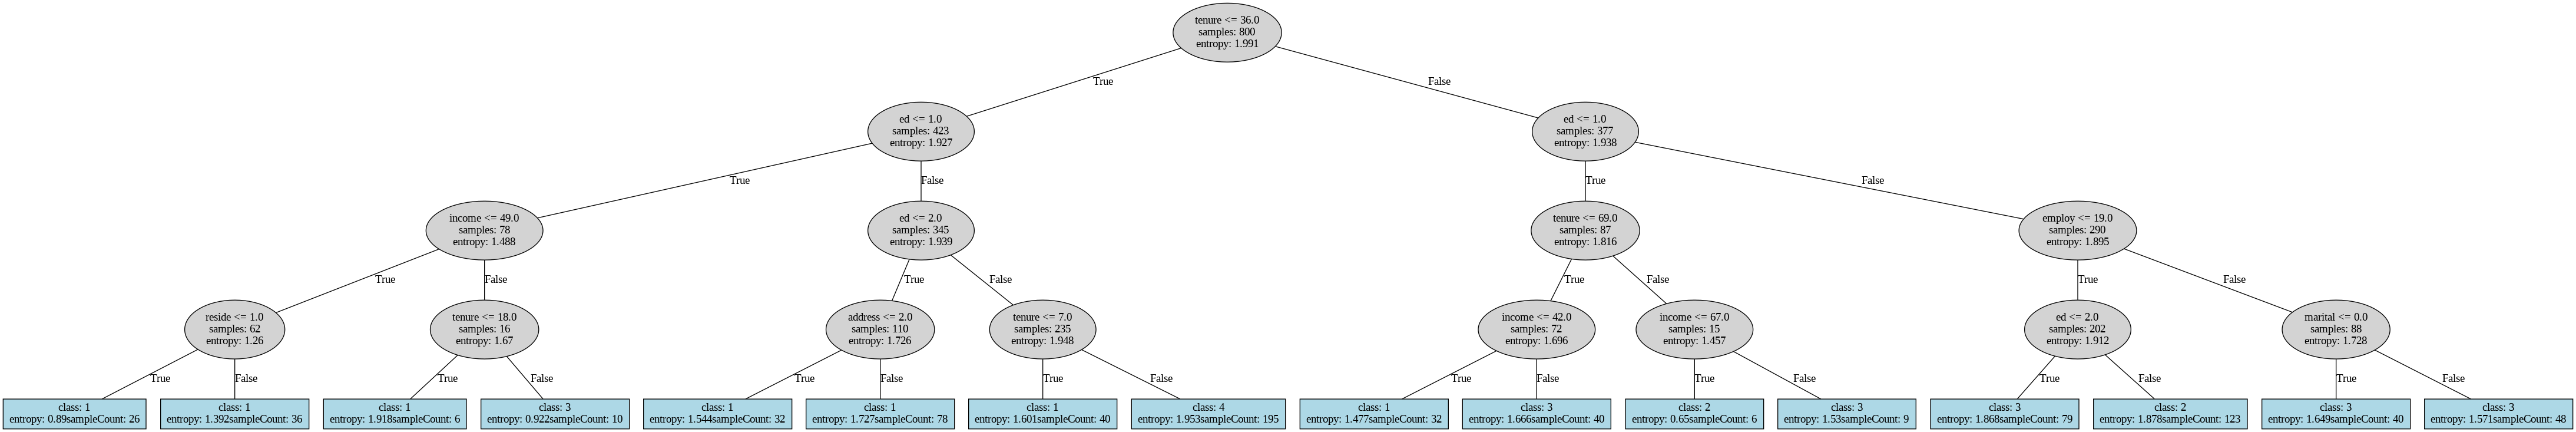

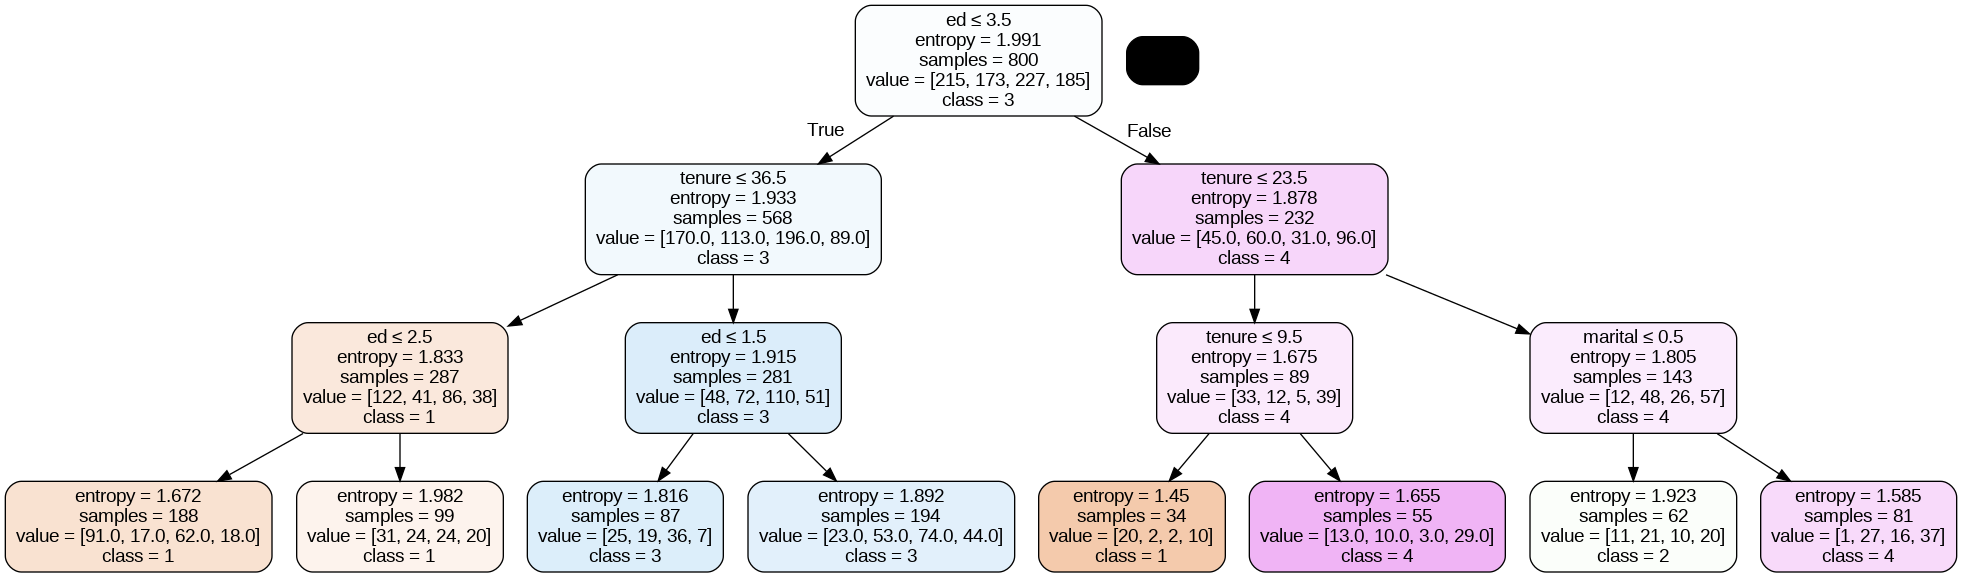

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image, display
import pydotplus

feature_names = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
class_names = [str(c) for c in np.unique(y)]

# Kendi ağacı görselleştirme
def draw_tree_pydot(node, graph=None, node_id=0):
    if graph is None:
        graph = pydotplus.Dot("mytree", graph_type="graph")
    this_node_id = str(node_id)
    if node.is_leaf():
        label = f"class: {node.value}\nentropy: {round(node.entropy, 3)}\sampleCount: {node.sample_count}"
        graph_node = pydotplus.Node(this_node_id, label=label, shape="box", style="filled", fillcolor="lightblue")
        graph.add_node(graph_node)
        return graph, node_id + 1
    label = (
        f"{feature_names[node.feature]} <= {round(node.threshold, 2)}\n"
        f"samples: {node.sample_count}\nentropy: {round(node.entropy, 3)}"
    )
    graph_node = pydotplus.Node(this_node_id, label=label, shape="ellipse", style="filled", fillcolor="lightgrey")
    graph.add_node(graph_node)
    graph, left_id = draw_tree_pydot(node.left, graph, node_id + 1)
    left_node_id = str(node_id + 1)
    graph.add_edge(pydotplus.Edge(this_node_id, left_node_id, label="True"))
    graph, right_id = draw_tree_pydot(node.right, graph, left_id)
    right_node_id = str(left_id)
    graph.add_edge(pydotplus.Edge(this_node_id, right_node_id, label="False"))
    return graph, right_id

# Kendi karar ağacını oluştur ve göster
CATEGORICAL_FEATURES = [0, 3, 6, 8, 9]
my_tree = build_tree(X_train, y_train, CATEGORICAL_FEATURES, max_depth=4)
graph, _ = draw_tree_pydot(my_tree)
my_tree_img = Image(graph.create_png())
display(my_tree_img)

# Sklearn ağacı oluştur ve görselleştir
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                 feature_names=feature_names,
                                 class_names=class_names,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
sk_tree_img = Image(graph2.create_png())
display(sk_tree_img)
